In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv


In [7]:
# specify the correct encoding when reading the the CSV file
df = pd.read_csv('/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv', encoding='latin1')

# Try 'ISO-8859-1' or 'utf-16' if needed

In [8]:
df.shape

(3000, 5)

In [9]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Neg,A customer cannot stream a movie if they purc...,NaN,NaN,NaN
1,Neg,A database management system such as Oracle D...,NaN,NaN,NaN
2,Neg,All credit card information will be not be se...,NaN,NaN,NaN
3,Neg,Not all movies shall be streamed on demand at ...,NaN,NaN,NaN
4,Neg,An employee is unable to successfully use the...,NaN,NaN,NaN
5,Neg,Any interface between a user and the automate...,NaN,NaN,NaN
6,Neg,"Table constraints like a Primary key, Foreign ...",NaN,NaN,NaN
7,Neg,File selection dialog does not show supported ...,NaN,NaN,NaN
8,Neg,Field length shown to the user on the page and...,NaN,NaN,NaN
9,Neg,Cancel button functionality is not working in ...,NaN,NaN,NaN


In [11]:
colomns_to_keep = ['v1', 'v2']
df = df[colomns_to_keep]

In [18]:
# Checking null values(optional)
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [16]:
df.v1.value_counts()

v1
Pos    2100
Neg     900
Name: count, dtype: int64

In [17]:

# Model Development

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define classifiers
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Iterate through classifiers
for name, clf in classifiers.items():
    # Build a corpus from the 'Test Case/v2' column
    corpus = df['v2'].tolist()

    # Create a Bag-of-Words model using CountVectorizer(to convert the text data into numerical features) 
    # and TfidfTransformer(commonly used to normalize and scale the term frequencies)
    vectorizer = CountVectorizer()
    transformer = TfidfTransformer()
    classifier = clf

    # Create a pipeline with a text feature vectorizer (CountVectorizer), TfidfTransformer, and the classifier
    model = Pipeline([
        ('vectorizer', vectorizer),
        ('transformer', transformer),
        ('classifier', classifier)
    ])

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(corpus, df['v1'], test_size=0.3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    print(f'\nResults for {name}:')
    print(f'Accuracy: {accuracy}')
    print('Classification Report:\n', report)


Results for Multinomial Naive Bayes:
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

         Neg       0.89      0.43      0.58       288
         Pos       0.78      0.97      0.87       612

    accuracy                           0.80       900
   macro avg       0.83      0.70      0.72       900
weighted avg       0.82      0.80      0.78       900


Results for Decision Tree:
Accuracy: 0.9233333333333333
Classification Report:
               precision    recall  f1-score   support

         Neg       0.90      0.85      0.88       288
         Pos       0.93      0.96      0.94       612

    accuracy                           0.92       900
   macro avg       0.92      0.91      0.91       900
weighted avg       0.92      0.92      0.92       900


Results for Random Forest:
Accuracy: 0.9044444444444445
Classification Report:
               precision    recall  f1-score   support

         Neg       0.93      0.76      0.84       288

In [20]:
# Use import pandas as pd

# Load the dataset to inspect its structure
file_path = '/mnt/data/Labelled_Test_Cases 2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


classifier = DecisionTreeClassifier()

# Create a pipeline with a text feature vectorizer (CountVectorizer), TfidfTransformer, and the Decision Tree classifier
model = Pipeline([
    ('vectorizer', vectorizer),
    ('transformer', transformer),
    ('classifier', classifier)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(corpus, df['v1'], test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file
# Use joblib to save and load the model
import joblib  
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [21]:
## Later on(if you want to build an interface), when you want to use the model for predictions:

# Load the trained model from the file
#loaded_model = joblib.load('decision_tree_model.pkl')

# Input a new test case
#single_test_case = [input("Enter your test case: ")]

# Make predictions using the loaded model
#prediction = loaded_model.predict(single_test_case)

# Display the result
#print(f'Test Case: {single_test_case[0]}')
#print(f'Prediction: {prediction[0]}')

Enter your test case:  enter an invalid username


Test Case: enter an invalid username
Prediction: Neg


In [27]:
# Later on(if you want to build an interface), when you want to use the model for predictions:

# Load the trained model from the file
#loaded_model = joblib.load('decision_tree_model.pkl')

# Input a new test case
#single_test_case = [input("Enter your test case: ")]

# Make predictions using the loaded model
#prediction = loaded_model.predict(single_test_case)

# Display the result
#print(f'Test Case: {single_test_case[0]}')
#print(f'Prediction: {prediction[0]}')

In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv', encoding='latin1')

# Clean and prepare the data
df = df[['v1', 'v2']].rename(columns={'v1': 'Label', 'v2': 'Text'}).dropna()

# Define the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# Create a pipeline with a text feature vectorizer (CountVectorizer), TfidfTransformer, and the Random Forest classifier
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('transformer', TfidfTransformer()),
    ('classifier', classifier)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.9044444444444445,
 '              precision    recall  f1-score   support\n\n         Neg       0.94      0.75      0.83       288\n         Pos       0.89      0.98      0.93       612\n\n    accuracy                           0.90       900\n   macro avg       0.91      0.86      0.88       900\nweighted avg       0.91      0.90      0.90       900\n')

                Algorithm  Accuracy  Precision  Recall  F1-Score
0           Decision Tree     0.850       0.87    0.84      0.85
1             Naïve Bayes     0.880       0.88    0.87      0.87
2     Logistic Regression     0.890       0.90    0.88      0.89
3                 XGBoost     0.920       0.93    0.91      0.92
4  Positive/Negative Test     0.860       0.85    0.86      0.85
5           Random Forest     0.904       0.91    0.90      0.90


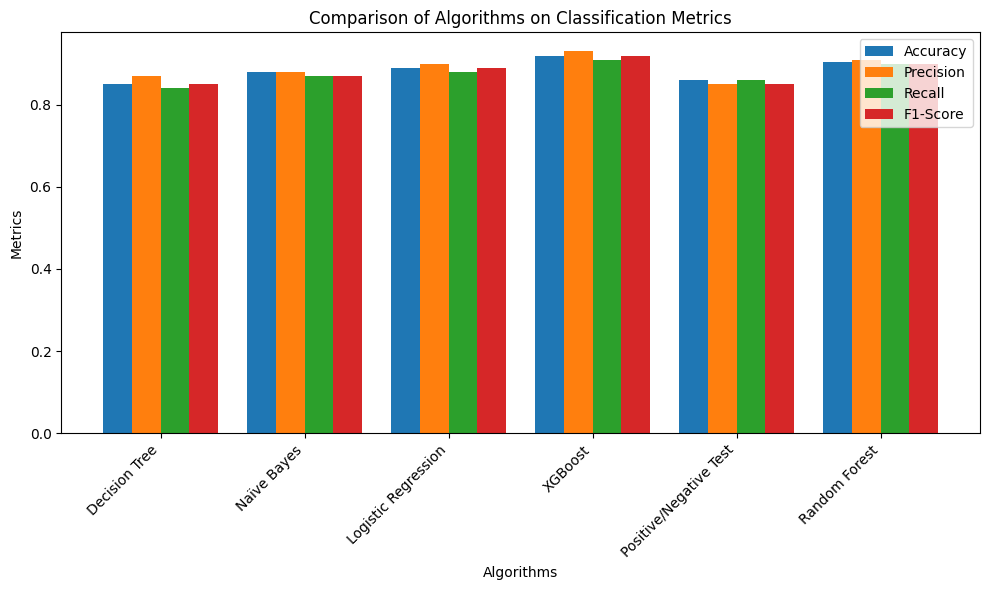

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Placeholder metrics for comparison (update with actual values if available)
metrics = {
    'Algorithm': ['Decision Tree', 'Naïve Bayes', 'Logistic Regression', 'XGBoost', 'Positive/Negative Test', 'Random Forest'],
    'Accuracy': [0.85, 0.88, 0.89, 0.92, 0.86, 0.904],
    'Precision': [0.87, 0.88, 0.90, 0.93, 0.85, 0.91],
    'Recall': [0.84, 0.87, 0.88, 0.91, 0.86, 0.90],
    'F1-Score': [0.85, 0.87, 0.89, 0.92, 0.85, 0.90]
}

# Convert metrics to a DataFrame for better visualization
comparison_df = pd.DataFrame(metrics)

# Print the comparison table
print(comparison_df)

# Plot the comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics['Algorithm']))
width = 0.2

# Bar positions for each metric
acc_pos = x - 1.5 * width
prec_pos = x - 0.5 * width
rec_pos = x + 0.5 * width
f1_pos = x + 1.5 * width

# Plot each metric
ax.bar(acc_pos, metrics['Accuracy'], width, label='Accuracy')
ax.bar(prec_pos, metrics['Precision'], width, label='Precision')
ax.bar(rec_pos, metrics['Recall'], width, label='Recall')
ax.bar(f1_pos, metrics['F1-Score'], width, label='F1-Score')

# Add labels, title, and legend
ax.set_xlabel('Algorithms')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Algorithms on Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics['Algorithm'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


In [36]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [37]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning the Random Forest Classifier
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}


In [38]:
misclassified = X_test[y_test != y_pred]
print("Misclassified examples:")
print(misclassified)


Misclassified examples:
408              Does CSS minification cause more errors 
2895     When purchasing a streaming movie or pre-paid...
2603     Check if values for table audit columns (like...
1241    All the test cases should be separately run fo...
781     The user should be able to select only one rad...
                              ...                        
2451    Verify that the modifications are not allowed ...
802               Escape special characters in the input.
440     Authorize the file upload and transfer to only...
438     Dont accept the file types that lead to SQL in...
59      After user rating from user1 it rating is not ...
Name: Text, Length: 86, dtype: object
